In [250]:
# Importing modules
import numpy as np
from matplotlib import pyplot as plt
import os
import datetime
import timeit
import time
import pickle
from statistics import mean 
from os.path import dirname as up
print("ok")

# setting path to data
repo_path = os.getcwd()
repo_path=r"C:\Users\Einav\Google Drive (howell.lab@mail.huji.ac.il)\Einav\Precision measurement - window interferometer\Repo\Lab-precision-measurements"

# functions to use:
def get_pickle_path(repo_path):
    two_up_path = up(up(repo_path))
    python_file_path = os.path.join(two_up_path, "Python")
    pickle_path = os.path.join(python_file_path, "Pickle_data") 
    return pickle_path

def round_done(repo_path):
    os.chdir(repo_path)
    print("done")

def plotting_saving(t,x,start_time,plt_num):
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)
    plt.title(datetime.datetime.fromtimestamp(start_time).strftime('plt'+plt_num+' - ch?, bad documentation : %Y-%m-%d, at %H:%M:%S'))
    plt.xlabel('time [min]')
    plt.ylabel('[Volt]]')
    plt.scatter(t, x,s = 1)
    save_name = "fig_"+add_the_time+"_plt"+plt_num+"_min"
    plt.savefig(save_name ,bbox_inches='tight')
    plt.show()
    
def plotting_saving_ch(t,x,start_time,ch_num,ch_name):
    # change to saving-directory
    save_to_path = os.path.join(repo_path, "figs")
    os.chdir(save_to_path)
    #
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)
    plt.title(datetime.datetime.fromtimestamp(start_time).strftime(ch_num+', '+ch_name+ ': %Y-%m-%d, at %H:%M:%S'))
    plt.xlabel('time [min]')
    plt.ylabel('[Volt]]')
    plt.scatter(t, x,s = 1)
    save_name = "fig_"+add_the_time+"_"+ch_num+"_min"
    plt.savefig(save_name ,bbox_inches='tight')
    plt.show()
        
# save_to_path = os.path.join(repo_path, "figs")
# os.chdir(save_to_path)

print("done")
# go back to original directory
os.chdir(repo_path)
print( os.getcwd())

ok
done
C:\Users\Einav\Google Drive (howell.lab@mail.huji.ac.il)\Einav\Precision measurement - window interferometer\Repo\Lab-precision-measurements


I'd like to go through all the files in my current data folder.
plot them out - and save to an image.
the figure will have a flie name with a format:
fig_2020_09_01.png
saved to the original directory in the figs folder.

- go_to_pickle_data(repo_path)
- get data
- print out the data
- go back to fig_path
- save
- go back to the original directory.

In [168]:
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

saved_files = os.listdir()
# print("files in directory:\n",saved_files)

round_done(repo_path)

done
C:\Users\Einav\Google Drive (howell.lab@mail.huji.ac.il)\Einav\Precision measurement - window interferometer\Repo\Lab-precision-measurements


In [257]:
# 20200916_1827

list_of_files_yet_to_open = saved_files.copy()
time_stamps = []

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200916_1827.pickle'
list_of_files_yet_to_open.remove(file_name)
list_of_files_yet_to_open.remove('data__20200916_1827 - Copy.pickle')
list_of_files_yet_to_open.remove('data__20200916_1827_Copy.pickle')

f = open(file_name,'rb')
scope_data = pickle.load(f)
print(scope_data[0])

start_time = scope_data[1]

# get time stamps, this takes a while.
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                #scope_data.append(pickle.load(handle))
                time_stamps.append(temp_array[1])
        except EOFError:
            pass
        
print("timestamps data retrieved")
print("this run was "+str(10*len(time_stamps))+ "minutes long")

# print("all the time stamps:")
# for x in range(len(time_stamps)):
#     print(x," Started at :", datetime.datetime.fromtimestamp(time_stamps[x]).strftime('%Y-%m-%d %H:%M:%S'))  

round_done(repo_path)

str_of_vars,t_stamp,ch1_data,ch1_time,ch3_data,ch3_time,ch4_data,ch4_time,ch1_data_again,ch1_time_again
timestamps data retrieved
this run was 850minutes long
done


In [172]:
# 20200916_1827

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get avg data from ch1 [Amplified x axis]
ch1_data = []
ch1_time = []
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                #scope_data.append(pickle.load(handle))
                ch1_data.append(mean( temp_array[2])) 
                #temp_time = temp_array[3]
                #time_diff = temp_array[1]/60 - start_time
                #temp_time = [x+time_diff for x in temp_time] 
                ch1_time.append(temp_array[1]) 
                
        except EOFError:
            pass
print("done, got data for ch1")
ch1_time_min= [(x - start_time)/60 for x in ch1_time]  


round_done(repo_path)

done, got data for ch1
done


20200916_1827


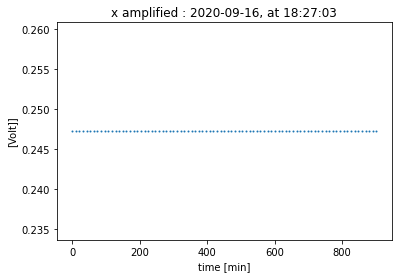

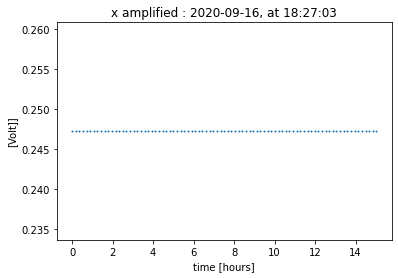

done


In [174]:
# 20200916_1827 - saving images
save_to_path = os.path.join(repo_path, "figs")
os.chdir(save_to_path)

add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
print(add_the_time)

plt.title(datetime.datetime.fromtimestamp(time_stamps[0]).strftime('x amplified : %Y-%m-%d, at %H:%M:%S'))
plt.xlabel('time [min]')
plt.ylabel('[Volt]]')

plt.scatter(ch1_time_min, ch1_data,s = 1)
save_name = "fig_"+add_the_time+"_ch1_min"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()

ch1_time_h= [x/60 for x in ch1_time_min]  

plt.title(datetime.datetime.fromtimestamp(time_stamps[0]).strftime('x amplified : %Y-%m-%d, at %H:%M:%S'))
plt.xlabel('time [hours]') 
plt.ylabel('[Volt]]')

plt.scatter(ch1_time_h, ch1_data,s = 1)
save_name = "fig_"+add_the_time+"_ch1_hours"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()


round_done(repo_path)

done, got data for ch3 and ch4


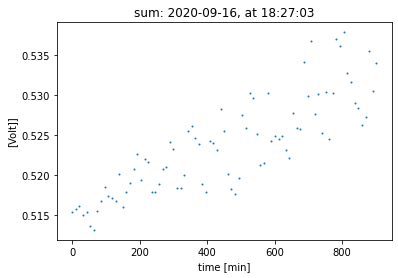

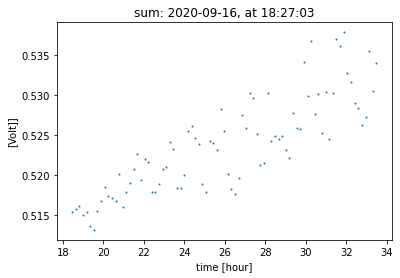

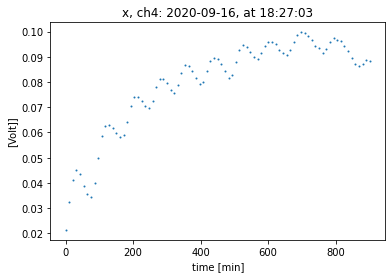

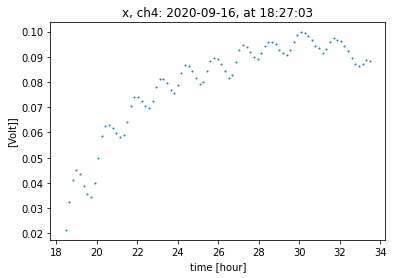

done


In [176]:
# 20200916_1827 
# get avg data from ch3 [sum]

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

ch3_data = []
ch3_time = []
ch4_data = []
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                #scope_data.append(pickle.load(handle))
                ch3_data.append(mean( temp_array[4])) 
                ch4_data.append(mean( temp_array[6]))
                #temp_time = temp_array[3]
                #time_diff = temp_array[1]/60 - start_time
                #temp_time = [x+time_diff for x in temp_time] 
                ch3_time.append(temp_array[1]) 
                
        except EOFError:
            pass
print("done, got data for ch3 and ch4")

# set path to save.
save_to_path = os.path.join(repo_path, "figs")
os.chdir(save_to_path)

ch3_time_min= [(x - start_time)/60 for x in ch1_time]  

plt.title(datetime.datetime.fromtimestamp(time_stamps[0]).strftime('sum: %Y-%m-%d, at %H:%M:%S'))
plt.xlabel('time [min]')
plt.ylabel('[Volt]]')

plt.scatter(ch3_time_min, ch3_data,s = 1)
save_name = "fig_"+add_the_time+"_ch3_min"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()


ch3_time_h= [x/60+18.45 for x in ch1_time_min]  
#or i in range(len(ch3_time_h)):
    # ch3_time_h[i]>=24:
        #h3_time_h[i] = ch3_time_h[i] - 24
    

plt.title(datetime.datetime.fromtimestamp(time_stamps[0]).strftime('sum: %Y-%m-%d, at %H:%M:%S')) 
plt.xlabel('time [hour]') 
plt.ylabel('[Volt]]')

plt.scatter(ch3_time_h, ch3_data,s = 1)
save_name = "fig_"+add_the_time+"_ch3_hours"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()


plt.title(datetime.datetime.fromtimestamp(time_stamps[0]).strftime('x, ch4: %Y-%m-%d, at %H:%M:%S'))
plt.xlabel('time [min]')
plt.ylabel('[Volt]]')

plt.scatter(ch3_time_min, ch4_data,s = 1)
save_name = "fig_"+add_the_time+"_ch4_min"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()

plt.title(datetime.datetime.fromtimestamp(time_stamps[0]).strftime('x, ch4: %Y-%m-%d, at %H:%M:%S')) 
plt.xlabel('time [hour]') 
plt.ylabel('[Volt]]')

plt.scatter(ch3_time_h, ch4_data,s = 1)
save_name = "fig_"+add_the_time+"_ch4_hours"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()

round_done(repo_path)

In [ ]:
# 20200915_1141

def plotting_saving(t,x,start_time,plt_num):
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)
    plt.title(datetime.datetime.fromtimestamp(start_time).strftime('plt'+plt_num+' - ch?, bad documentation : %Y-%m-%d, at %H:%M:%S'))
    plt.xlabel('time [min]')
    plt.ylabel('[Volt]]')
    plt.scatter(t, x,s = 1)
    save_name = "fig_"+add_the_time+"_plt"+plt_num+"_min"
    plt.savefig(save_name ,bbox_inches='tight')
    plt.show()
    
# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_200915__1140.pickle'
# list_of_files_yet_to_open.remove(file_name)

# check if there's anything elso in the pickle
n = 0
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print("start time: ", temp_array[0][0])
                print(len(temp_array))
                start_time = temp_array[0][0]
                t1 = temp_array[0][1:]
                x1 = temp_array[1]
                t2 = temp_array[2][1:]
                x2 = temp_array[3]
                # change to saving-directory
                save_to_path = os.path.join(repo_path, "figs")
                os.chdir(save_to_path)
                plt_num = str(n+1)
                plotting_saving(t1,x1,start_time,plt_num)
                plt_num = str(n+2)
                plotting_saving(t2,x2,start_time,plt_num)
                n = n+2
                # set path to get data
                pickle_path = get_pickle_path(repo_path)
                os.chdir(pickle_path)
        except EOFError:
            pass
        
round_done(repo_path)

In [ ]:
# 20200913_1219

time_stamps = []

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_130920n1219.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data[1])
# print(len(scope_data))
x = scope_data[1]
t = scope_data[0][1:]
start_time = scope_data[0][0]
# print(len(x),len(t))

# change to saving-directory
save_to_path = os.path.join(repo_path, "figs")
os.chdir(save_to_path)

add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
# print(add_the_time)

plt.title(datetime.datetime.fromtimestamp(start_time).strftime('ch1, x amplified : %Y-%m-%d, at %H:%M:%S'))
plt.xlabel('time [min]')
plt.ylabel('[Volt]]')
plt.scatter(t, x,s = 1)
save_name = "fig_"+add_the_time+"_ch1_min"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()

round_done(repo_path)

2
20200913_1601


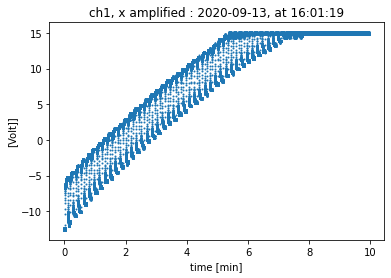

done


In [204]:
# 20200913_1601
time_stamps = []

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_200913n1600.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
print(len(scope_data))

x = scope_data[1]
t = scope_data[0][1:]
start_time = scope_data[0][0]

# change to saving-directory
save_to_path = os.path.join(repo_path, "figs")
os.chdir(save_to_path)

add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
print(add_the_time)
plt.title(datetime.datetime.fromtimestamp(start_time).strftime('ch1, x amplified : %Y-%m-%d, at %H:%M:%S'))
plt.xlabel('time [min]')
plt.ylabel('[Volt]]')
plt.scatter(t, x,s = 1)
save_name = "fig_"+add_the_time+"_ch1_min"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()
round_done(repo_path)

4
start time:  1600178584.81615
4
20200915_1703


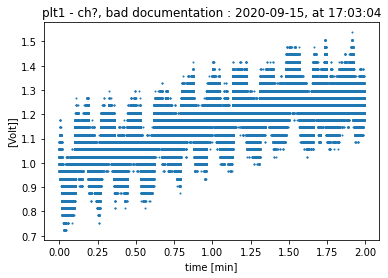

20200915_1703


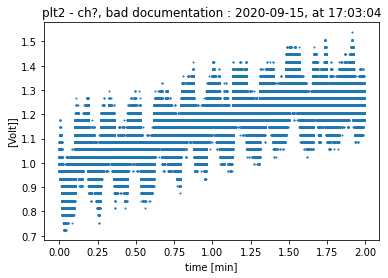

start time:  1600179207.7327304
4
20200915_1713


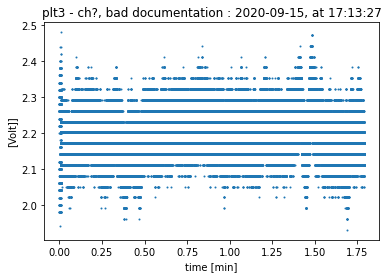

20200915_1713


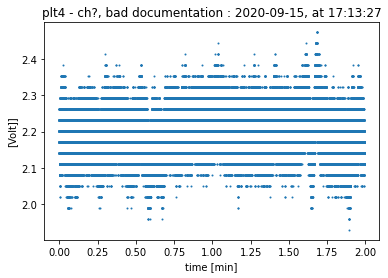

done


In [202]:
# 20200915_1703  , 20200915_1713
time_stamps = []

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_200915__1700.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
print(len(scope_data))

# with open(file_name, 'rb') as handle:
#         try:
#             while True:
#                 temp_array = pickle.load(handle)
#                 print(len(temp_array))
                
#         except EOFError:
#             pass
        
n = 0
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print("start time: ", temp_array[0][0])
                print(len(temp_array))
                start_time = temp_array[0][0]
                t1 = temp_array[0][1:]
                x1 = temp_array[1]
                t2 = temp_array[2][1:]
                x2 = temp_array[3]
                # change to saving-directory
                save_to_path = os.path.join(repo_path, "figs")
                os.chdir(save_to_path)
                plt_num = str(n+1)
                plotting_saving(t1,x1,start_time,plt_num)
                plt_num = str(n+2)
                plotting_saving(t2,x2,start_time,plt_num)
                n = n+2
                # set path to get data
                pickle_path = get_pickle_path(repo_path)
                os.chdir(pickle_path)
        except EOFError:
            pass
        
round_done(repo_path)

2
20200913_1601


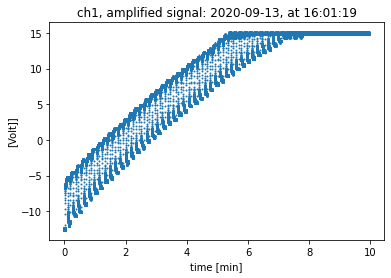

4
20200913_1620


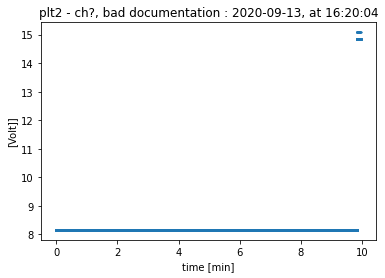

20200913_1620


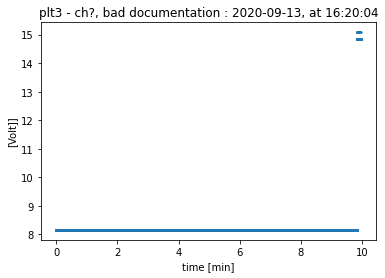

done


In [213]:
# 20200913_1601
time_stamps = []

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_200913n1600.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))

def plotting_saving_ch(t,x,start_time,ch_num,ch_name):
    # change to saving-directory
    save_to_path = os.path.join(repo_path, "figs")
    os.chdir(save_to_path)
    #
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)
    plt.title(datetime.datetime.fromtimestamp(start_time).strftime(ch_num+', '+ch_name+ ': %Y-%m-%d, at %H:%M:%S'))
    plt.xlabel('time [min]')
    plt.ylabel('[Volt]]')
    plt.scatter(t, x,s = 1)
    save_name = "fig_"+add_the_time+"_"+ch_num+"_min"
    plt.savefig(save_name ,bbox_inches='tight')
    plt.show()

n = 0
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
                if len(temp_array) == 2:
                    start_time = temp_array[0][0]
                    t = temp_array[0][1:]
                    x = temp_array[1]
                    plt_num = n
                    ch_num = 'ch1'
                    ch_name ='amplified signal'
                    plotting_saving_ch(t,x,start_time,ch_num,ch_name)
                    n=n+1
                    # set path to get data
                    pickle_path = get_pickle_path(repo_path)
                    os.chdir(pickle_path)
                else:
                    start_time = temp_array[0][0]
                    t1 = temp_array[0][1:]
                    x1 = temp_array[1]
                    t2 = temp_array[2][1:]
                    x2 = temp_array[3]
                    # change to saving-directory
                    save_to_path = os.path.join(repo_path, "figs")
                    os.chdir(save_to_path)
                    plt_num = str(n+1)
                    plotting_saving(t1,x1,start_time,plt_num)
                    plt_num = str(n+2)
                    plotting_saving(t2,x2,start_time,plt_num)
                    n = n+2
                    # set path to get data
                    pickle_path = get_pickle_path(repo_path)
                    os.chdir(pickle_path)
        except EOFError:
            pass
        
round_done(repo_path)

In [246]:
# 20200915_2322

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_200915__2300.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))
start_time = scope_data[0][0]
ch1_data = []
ch4_data = []
ch1_time = []
ch4_time = []
    
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                data_time = temp_array[0][0]
                time_vec = temp_array[0][1:]
                new_ch1_data = temp_array[1]
                
                ch1_t = [data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t

                ch4_time_vec = temp_array[2][1:]
                new_ch4_data = temp_array[3]
                ch4_t = [data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t
                
                
#                 print(len(ch1_data))
#                 print(len(temp_array))

#                 print(len(temp_array),datetime.datetime.fromtimestamp(start_time).strftime(': %Y-%m-%d, at %H:%M:%S'))
        except EOFError:
            pass
        
t = ch1_time
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)        

t = ch4_time
x = ch4_data
ch_num = "ch1_again"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

round_done(repo_path)

done


20200916_1259
20200916_1259


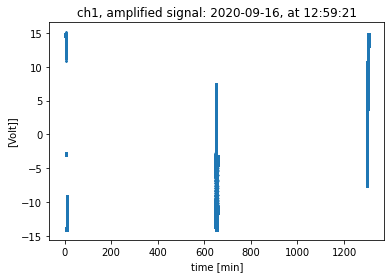

20200916_1259


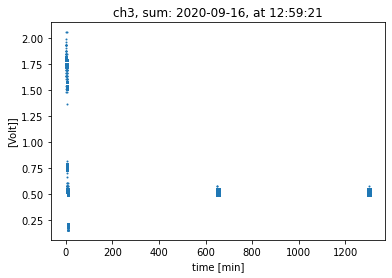

20200916_1259


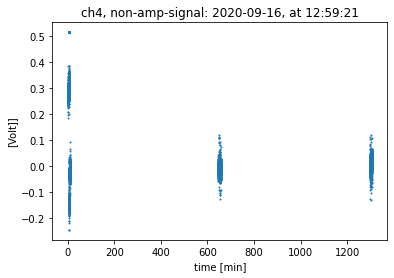

done


In [293]:
# 20200916_1259

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_200916__1248.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))
start_time = scope_data[2][0]
ch1_data = []
ch4_data = []
ch1_time = []
ch4_time = []
ch3_data = []
ch3_time = []

# add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
# print(add_the_time)

with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
#                 print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2][0]
                time_vec = temp_array[2][1:]
                new_ch1_data = temp_array[1]
                
                ch1_t = [data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6][1]
                ch3_t = [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8][1]
                new_ch4_data = temp_array[7]
                ch4_t = [data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
t = ch1_time
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   

t = ch4_time
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

round_done(repo_path)

11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
20200923_0905


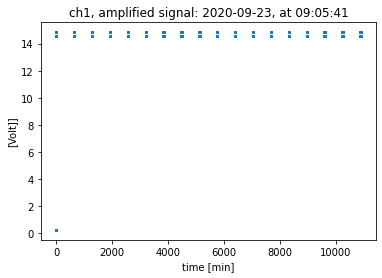

20200923_0905


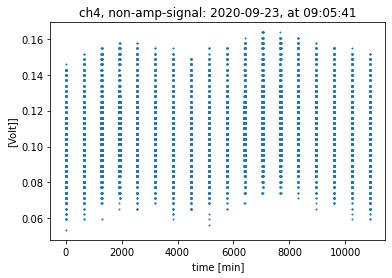

20200923_0905


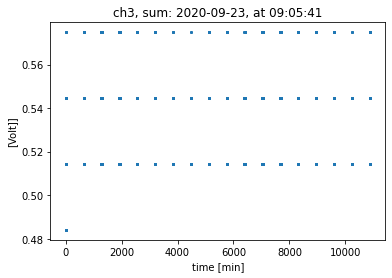

done


In [377]:
# 20200923_0905

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_20200923_0905.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
start_time = scope_data[2]


with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
#                 print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
                time_vec = temp_array[6]
                new_ch1_data = temp_array[3]
                
                ch1_t = [data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t = [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8]
                new_ch4_data = temp_array[7]
                ch4_t = [data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
t = ch1_time
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

round_done(repo_path)

20200924_1510


ValueError: x and y must be the same size

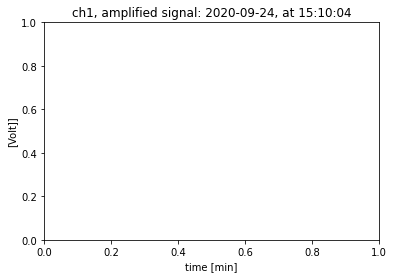

In [341]:
# 20200924_1510

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_20200924_1510.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
start_time = scope_data[2]


# add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
# print(add_the_time)
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
#                 print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
#                 time_vec = temp_array[4] # there was a problem saving data for t in original acquisition code.
#                 new_ch1_data = temp_array[3]
                
#                 ch1_t = [data_time+t-start_time for t in time_vec]
#                 ch1_data = ch1_data + new_ch1_data
#                 ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t = [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8]
                new_ch4_data = temp_array[7]
                ch4_t = [data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
# t = ch1_time
# x = ch1_data
# ch_num = "ch1"        
# ch_name = "amplified signal"
# plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

# print(scope_data[1])
# print(scope_data[2])
# print(len(scope_data[3]),len(scope_data[6]))
# print("\n")
# print('ch1_data',len(scope_data[3])," - ",scope_data[3][1:10])
# print('ch1_time',len(scope_data[4])," - ",scope_data[4])
# print('\nch3_data',len(scope_data[5])," - ",scope_data[5][1:10])
# print('ch3_time',len(scope_data[6])," - ",scope_data[6][1:10])
# print('\nch4_data',len(scope_data[7])," - ",scope_data[7][1:10])
# print('ch4_time',len(scope_data[8])," - ",scope_data[8][1:10])
# print('\nch1_data',scope_data[9][1:10])
# print('ch1_time',scope_data[10][1:10])

round_done(repo_path)

2
2
2
2
2
20200909_1914


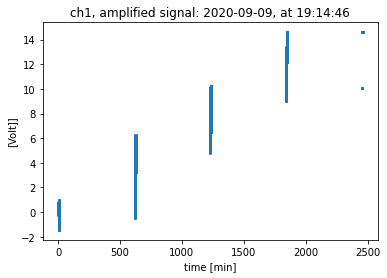

done


In [349]:
# 20200909_1914

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_dump_090920n1914.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))


# add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
# print(add_the_time)
start_time = scope_data[0][0]
x = [] #[1]
t = [] # scope_data[0][1:]
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
#                 print(len(temp_array))
                data_time =  temp_array[0][0]
                new_x = temp_array[1]
                new_t = temp_array[0][1:]
                ch1_t = [data_time+t-start_time for t in new_t]
                t = t+ ch1_t 
                x = x+ new_x 
        except EOFError:
            pass
        
# t = ch1_time
# x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  



# ch_num = 'ch1'
# ch_name ='amplified signal'
# plotting_saving_ch(t,x,start_time,ch_num,ch_name)
# n=n+1
# # set path to get data
# pickle_path = get_pickle_path(repo_path)
# os.chdir(pickle_path)        


round_done(repo_path)

20200916_1755


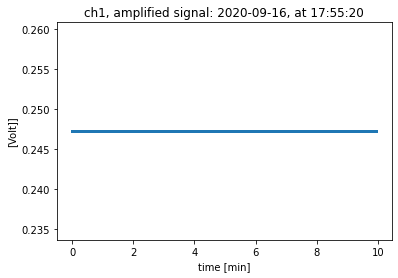

20200916_1755


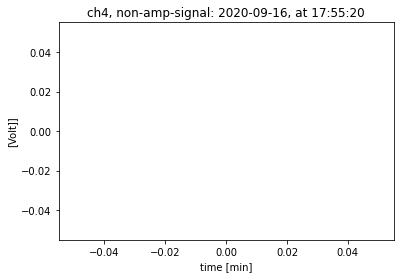

20200916_1755


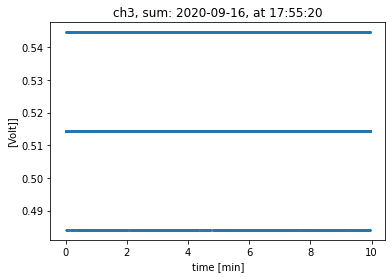

done


In [370]:
# 20200916_1755

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200916_1754.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))
start_time = scope_data[1]

ch1_data = []
ch4_data = []
ch1_time = []
ch4_time = []
ch3_data = []
ch3_time = []

# add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
# print(add_the_time)


with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                data_time = temp_array[1]
                
                new_ch1_data = temp_array[2]
                time_vec = temp_array[3]
                
                ch1_t = [data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[4]
                ch3_time_vec = temp_array[5]
                ch3_t = [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

#                 ch4_time_vec = temp_array[6]
#                 new_ch4_data = temp_array[7]
#                 ch4_t = [data_time+t-start_time for t in ch4_time_vec]
#                 ch4_data = ch4_data + new_ch4_data
#                 ch4_time = ch4_time + ch4_t
        except EOFError:
            pass

        
t = ch1_time
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

round_done(repo_path)

20200917_1418


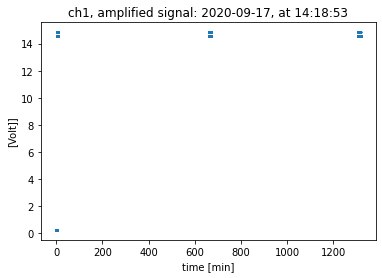

20200917_1418


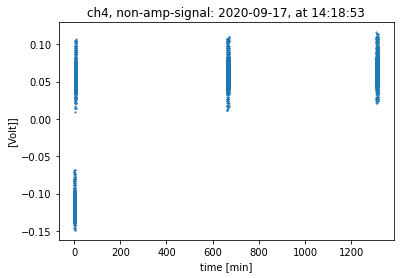

20200917_1418


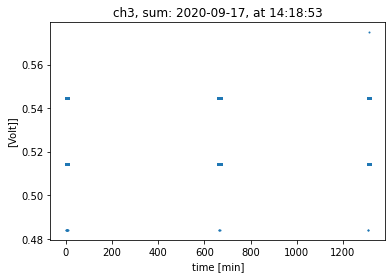

done


In [382]:
# 20200917_1418

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200917_1418.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
start_time = scope_data[2]

# add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
# print(add_the_time)



with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
#                 print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
                time_vec = temp_array[6]
                new_ch1_data = temp_array[3]
                
                ch1_t = [data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t = [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8]
                new_ch4_data = temp_array[7]
                ch4_t = [data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
        
t = ch1_time
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  


round_done(repo_path)

20200917_1458


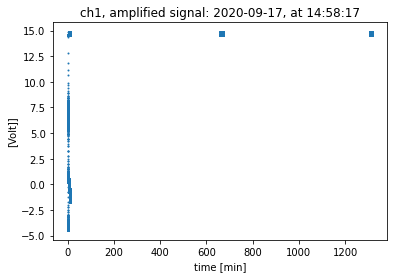

20200917_1458


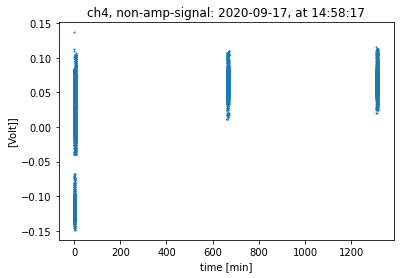

20200917_1458


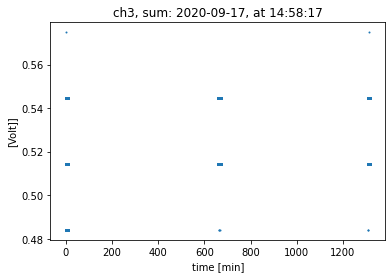

done


In [388]:
# 20200917_1458

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200917_1458.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))
start_time = scope_data[2]

with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
#                 print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
                time_vec = temp_array[6]
                new_ch1_data = temp_array[3]
                
                ch1_t = [data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t = [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8]
                new_ch4_data = temp_array[7]
                ch4_t = [data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
        
t = ch1_time
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  


round_done(repo_path)

20200917_1529


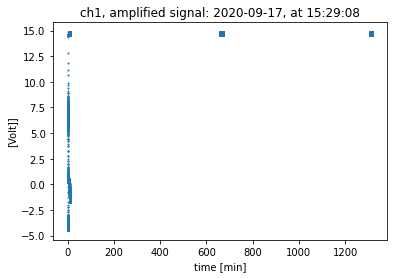

20200917_1529


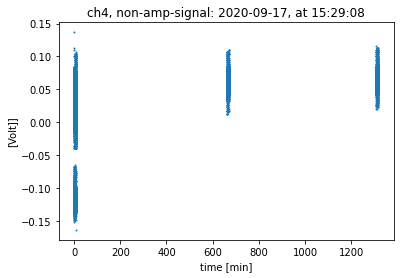

20200917_1529


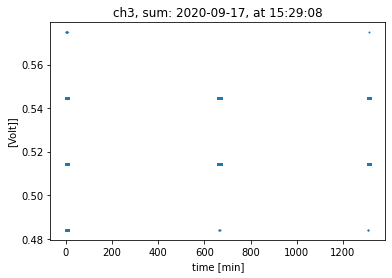

done


In [391]:
# 20200917_1529

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200917_1529.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
start_time = scope_data[2]

with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
#                 print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
                time_vec = temp_array[6]
                new_ch1_data = temp_array[3]
                
                ch1_t = [data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t = [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8]
                new_ch4_data = temp_array[7]
                ch4_t = [data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
        
t = ch1_time
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  


round_done(repo_path)

20200917_1716


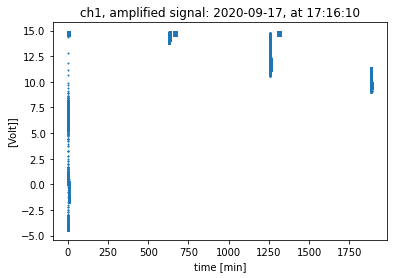

20200917_1716


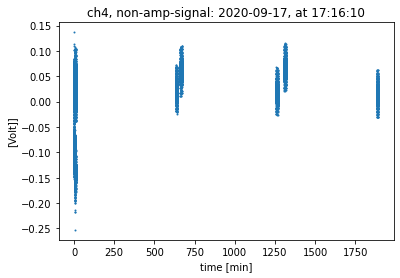

20200917_1716


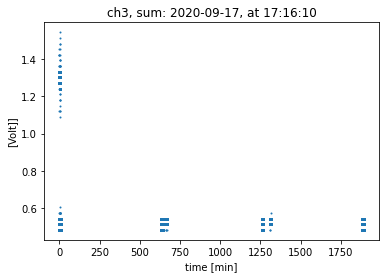

done


In [396]:
# 20200917_1716

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200917_1716.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)

start_time = scope_data[2]

with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
#                 print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
                time_vec = temp_array[4]#temp_array[6]
                new_ch1_data = temp_array[3]
                
                ch1_t = [data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t = [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8]
                new_ch4_data = temp_array[7]
                ch4_t = [data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
        
t = ch1_time
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  


round_done(repo_path)

20200917_1811


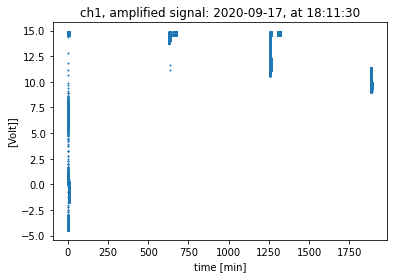

20200917_1811


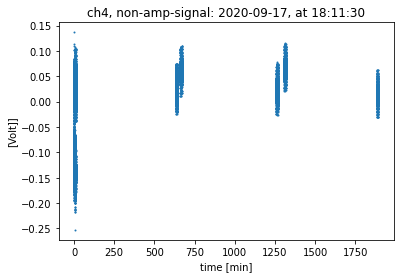

20200917_1811


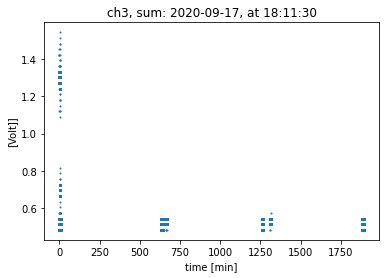

done


In [402]:
# 20200917_1811

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200917_1811.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)

start_time = scope_data[2]

with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
#                 print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
                time_vec = temp_array[4]#temp_array[6]
                new_ch1_data = temp_array[3]
                
                ch1_t = [data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t = [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8]
                new_ch4_data = temp_array[7]
                ch4_t = [data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
        
t = ch1_time
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  


round_done(repo_path)

In [ ]:
# 20200917_1855

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200917_1855.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))
start_time = scope_data[2]


with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
#                 print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
                time_vec = temp_array[4]#temp_array[6]
                new_ch1_data = temp_array[3]
                
                ch1_t = [data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t = [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8]
                new_ch4_data = temp_array[7]
                ch4_t = [data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
        
t = ch1_time
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  


round_done(repo_path)

20200917_1855


In [ ]:
#

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))
start_time = scope_data[2]

# add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
# print(add_the_time)


with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
        except EOFError:
            pass

        
add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
print(add_the_time)

round_done(repo_path)

# extra stuff

In [379]:
print(len(ch1_data))
print(len(ch1_time))
print(("\n"))
print(len(ch3_data))
print(len(ch3_time))
print(("\n"))
print(len(ch4_data))
print(len(ch4_time))
print(("\n"))
ch1_data = []
ch4_data = []
ch1_time = []
ch4_time = []
ch3_data = []
ch3_time = []

5640264
5640264


5640264
5640264


5343408
5343408




In [397]:
print(scope_data[1])

print(len(scope_data[3]),len(scope_data[4]),len(scope_data[6]))
print("\n")

# print(scope_data[2][1:10])

print('ch1_data',len(scope_data[3]))
print('ch1_time',len(scope_data[4]))

# print('\nch3_data',len(scope_data[5])," - ",scope_data[5][1:10])
# print('ch3_time',len(scope_data[6])," - ",scope_data[6][1:10])
# print('\nch4_data',len(scope_data[7])," - ",scope_data[7][1:10])
# print('ch4_time',len(scope_data[8])," - ",scope_data[8][1:10])
# print('\nch1_data',scope_data[9][1:10])
# # print('ch1_time',scope_data[10][1:10])

discription,str_of_vars,t_stamp,ch1_data,ch1_time,ch3_data,ch3_time,ch4_data,ch4_time
296856 296856 296856


ch1_data 296856
ch1_time 296856


In [ ]:
#

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))
start_time = scope_data[2]

# add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
# print(add_the_time)


with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
        except EOFError:
            pass

        
add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
print(add_the_time)

round_done(repo_path)

In [383]:
print( os.getcwd())

C:\Users\Einav\Google Drive (howell.lab@mail.huji.ac.il)\Einav\Precision measurement - window interferometer\Repo\Lab-precision-measurements


In [404]:
# progress:

file_names = ['data__20200917_1855.pickle','data__20200917_1811.pickle','data__20200917_1716.pickle','data__20200917_1529.pickle','data__20200917_1458.pickle','data__20200917_1418.pickle','data__20200916_1754.pickle','data_dump_090920n1914.pickle','data_20200924_1510.pickle','data_20200923_0905.pickle','data_200916__1248.pickle','data_200915__2300.pickle','data_200913n1600.pickle','data_140920n1818.pickle','data_200915__1140.pickle','data__20200916_1827_Copy.pickle','data__20200916_1827 - Copy.pickle','data__20200916_1827.pickle','data_130920n1219.pickle','data_200915__1700.pickle']

def check_off(file_names):
    list_of_files_yet_to_open = saved_files.copy()
    for file_name in file_names:
        list_of_files_yet_to_open.remove(file_name)
    print(len(list_of_files_yet_to_open))
#     print(list_of_files_yet_to_open)
    return list_of_files_yet_to_open

check_off(file_names)

9


['data__20200917_1855.pickle',
 'data__20200921_1228.pickle',
 'data__20200923_0815.pickle',
 'demo_3min_data__20200916_1812.pickle',
 'demo_3min_data__20200916_1819.pickle',
 'demo_run_0931.pickle',
 'demo_run_20200916_1419.pickle',
 'demo_run_20200916_1422.pickle',
 'desktop.ini']

In [94]:
# 140920_1818
# nothing here... 
time_stamps = []

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_140920n1818.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
print(scope_data)
# print(len(scope_data))

with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(temp_array)
        except EOFError:
            pass

round_done()

[]
[]
done
